# Experiment Evaluation
Look at experiment results, compare them and find representative examples for the thesis motivation.

In [1]:
import os
from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns
import jax.numpy as jnp

from enhancing_sgmcmc.utils import (
    run_experiment,
    plot_gmm_sampling,
    load_experiment_data,
    plot_combined_metric_comparison,
)

In [2]:
os.chdir("..")

In [3]:
%load_ext autoreload
%autoreload 2

## Unimodal Example
### Load Experiment Results

In [10]:
experiment_name = "unimodal_gaussian_2"
df = load_experiment_data(experiment_name)

In [11]:
df

,experiment_name,experiment_id,seed,data_config_id,data_means,data_covs,data_weights,data_num_samples,init_position,mcmc_samples,...,results_plot_path,results_runtime_seconds,wasserstein,nll,ksd,mean_ess,ess_ratio,ess_values,file,preconditioned
0,unimodal_gaussian_2,20250520_234020,1,0,"[[0, 0]]","[[[1, 0], [0, 1]]]",[1],500,"[0.0, 0.0]",500,...,results\unimodal_gaussian_2\data_1724a4\1\2025...,14.822456,0.000032,2.342287,0.863841,4.270865,0.963594,"[4.35004997253418, 4.191679954528809]",results\unimodal_gaussian_2\data_1724a4\1\2025...,False
1,unimodal_gaussian_2,20250520_234034,1,0,"[[0, 0]]","[[[1, 0], [0, 1]]]",[1],500,"[0.0, 0.0]",500,...,results\unimodal_gaussian_2\data_1724a4\1\2025...,8.447009,0.000036,2.119640,1.165971,4.562232,0.858289,"[4.910144329071045, 4.214320659637451]",results\unimodal_gaussian_2\data_1724a4\1\2025...,False
2,unimodal_gaussian_2,20250520_234042,1,0,"[[0, 0]]","[[[1, 0], [0, 1]]]",[1],500,"[0.0, 0.0]",500,...,results\unimodal_gaussian_2\data_1724a4\1\2025...,7.867446,0.000029,2.477693,0.300007,8.301854,0.820100,"[7.481290340423584, 9.122417449951172]",results\unimodal_gaussian_2\data_1724a4\1\2025...,False
3,unimodal_gaussian_2,20250520_234050,1,0,"[[0, 0]]","[[[1, 0], [0, 1]]]",[1],500,"[0.0, 0.0]",500,...,results\unimodal_gaussian_2\data_1724a4\1\2025...,8.194544,0.000025,2.674403,0.321534,9.341448,0.905284,"[9.805834770202637, 8.87706184387207]",results\unimodal_gaussian_2\data_1724a4\1\2025...,False
4,unimodal_gaussian_2,20250520_234059,1,0,"[[0, 0]]","[[[1, 0], [0, 1]]]",[1],500,"[0.0, 0.0]",500,...,results\unimodal_gaussian_2\data_1724a4\1\2025...,7.999168,0.000032,2.339028,0.867055,4.264277,0.963798,"[4.342889308929443, 4.185666084289551]",results\unimodal_gaussian_2\data_1724a4\1\2025...,True
5,unimodal_gaussian_2,20250520_234108,1,0,"[[0, 0]]","[[[1, 0], [0, 1]]]",[1],500,"[0.0, 0.0]",500,...,results\unimodal_gaussian_2\data_1724a4\1\2025...,8.654782,0.000036,2.118021,1.171406,4.562509,0.857344,"[4.912938594818115, 4.21207857131958]",results\unimodal_gaussian_2\data_1724a4\1\2025...,True
6,unimodal_gaussian_2,20250520_234117,1,0,"[[0, 0]]","[[[1, 0], [0, 1]]]",[1],500,"[0.0, 0.0]",500,...,results\unimodal_gaussian_2\data_1724a4\1\2025...,8.391798,0.000030,2.469962,0.303158,8.357159,0.831326,"[7.58742618560791, 9.126891136169434]",results\unimodal_gaussian_2\data_1724a4\1\2025...,True
7,unimodal_gaussian_2,20250520_234126,1,0,"[[0, 0]]","[[[1, 0], [0, 1]]]",[1],500,"[0.0, 0.0]",500,...,results\unimodal_gaussian_2\data_1724a4\1\2025...,8.533995,0.000025,2.674441,0.321733,9.231081,0.918516,"[9.623146057128906, 8.839015007019043]",results\unimodal_gaussian_2\data_1724a4\1\2025...,True
8,unimodal_gaussian_2,20250520_234136,2,0,"[[0, 0]]","[[[1, 0], [0, 1]]]",[1],500,"[0.0, 0.0]",500,...,results\unimodal_gaussian_2\data_1724a4\2\2025...,9.322831,0.000038,2.274801,0.886936,4.240960,0.594176,"[5.320566654205322, 3.16135311126709]",results\unimodal_gaussian_2\data_1724a4\2\2025...,False
9,unimodal_gaussian_2,20250520_234145,2,0,"[[0, 0]]","[[[1, 0], [0, 1]]]",[1],500,"[0.0, 0.0]",500,...,results\unimodal_gaussian_2\data_1724a4\2\2025...,8.935866,0.000039,2.170622,1.234264,4.283331,0.829029,"[4.683721542358398, 3.8829398155212402]",results\unimodal_gaussian_2\data_1724a4\2\2025...,False


## Hyperparameter Analysis

We tried out different values for step size and momentum decay to make sure finding optimal values for those both HPs for each given setting. It is hard to derive the effectiveness of sampling from the used metrics (wasserstein, nll) since they are quite generic and break down the problem to just one scalar. Since we are drawing quite many samples compared to the relatively simple true posterior it might be not clear which configuration works best. <br>
We choose to do visual inspection to check if there is a reasonable exploration exploitation tradeoff.

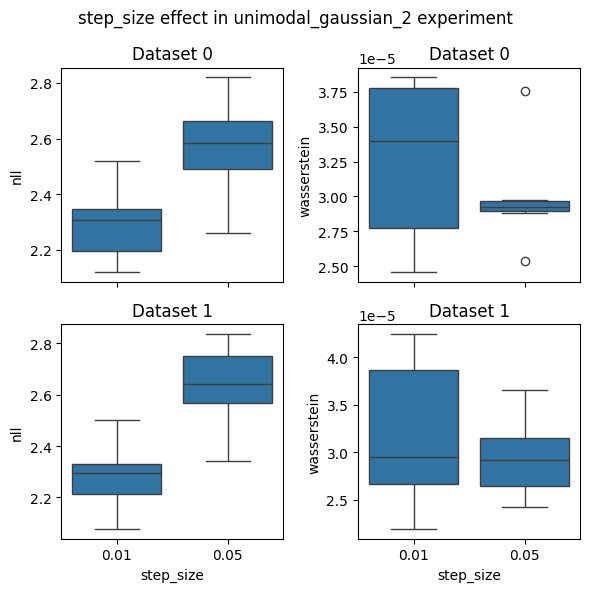

In [12]:
parameter = "step_size"

plot_combined_metric_comparison(
    df=df,
    metrics=["nll", "wasserstein"],
    param=parameter,
    filter_conditions={"preconditioned": False},
    title=f"{parameter} effect in {experiment_name} experiment",
    figsize=(6, 6),
    save_path=f"thesis/figures/{experiment_name}_{parameter}.png",
);

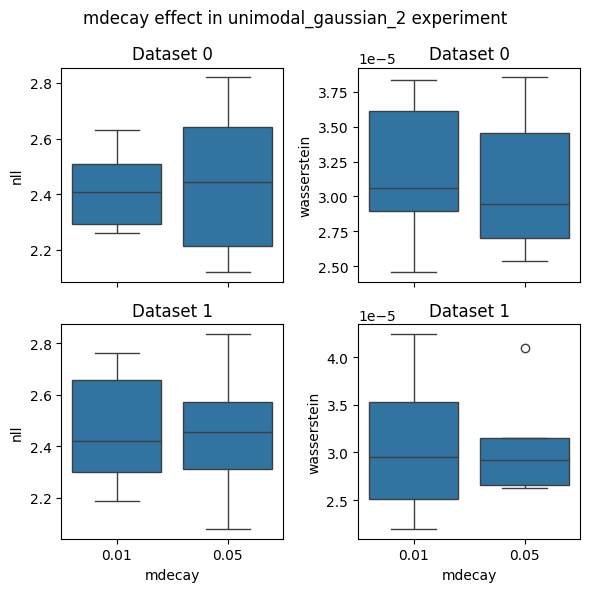

In [13]:
parameter = "mdecay"

plot_combined_metric_comparison(
    df=df,
    metrics=["nll", "wasserstein"],
    param=parameter,
    filter_conditions={"preconditioned": False},
    title=f"{parameter} effect in {experiment_name} experiment",
    figsize=(6, 6),
    save_path=f"thesis/figures/{experiment_name}_{parameter}.png",
);

The HPs have a interaction effect. For a larger step size (e.g. 0.05) a higher mdecay yields better metrics (lower wasserstein distance). While a smaller step size also requires a smaller mdecay. The overall metrics are better for the larger values, since they allow more exploration of the space. We also can see this effects when looking at the sampling trajectory through plots.

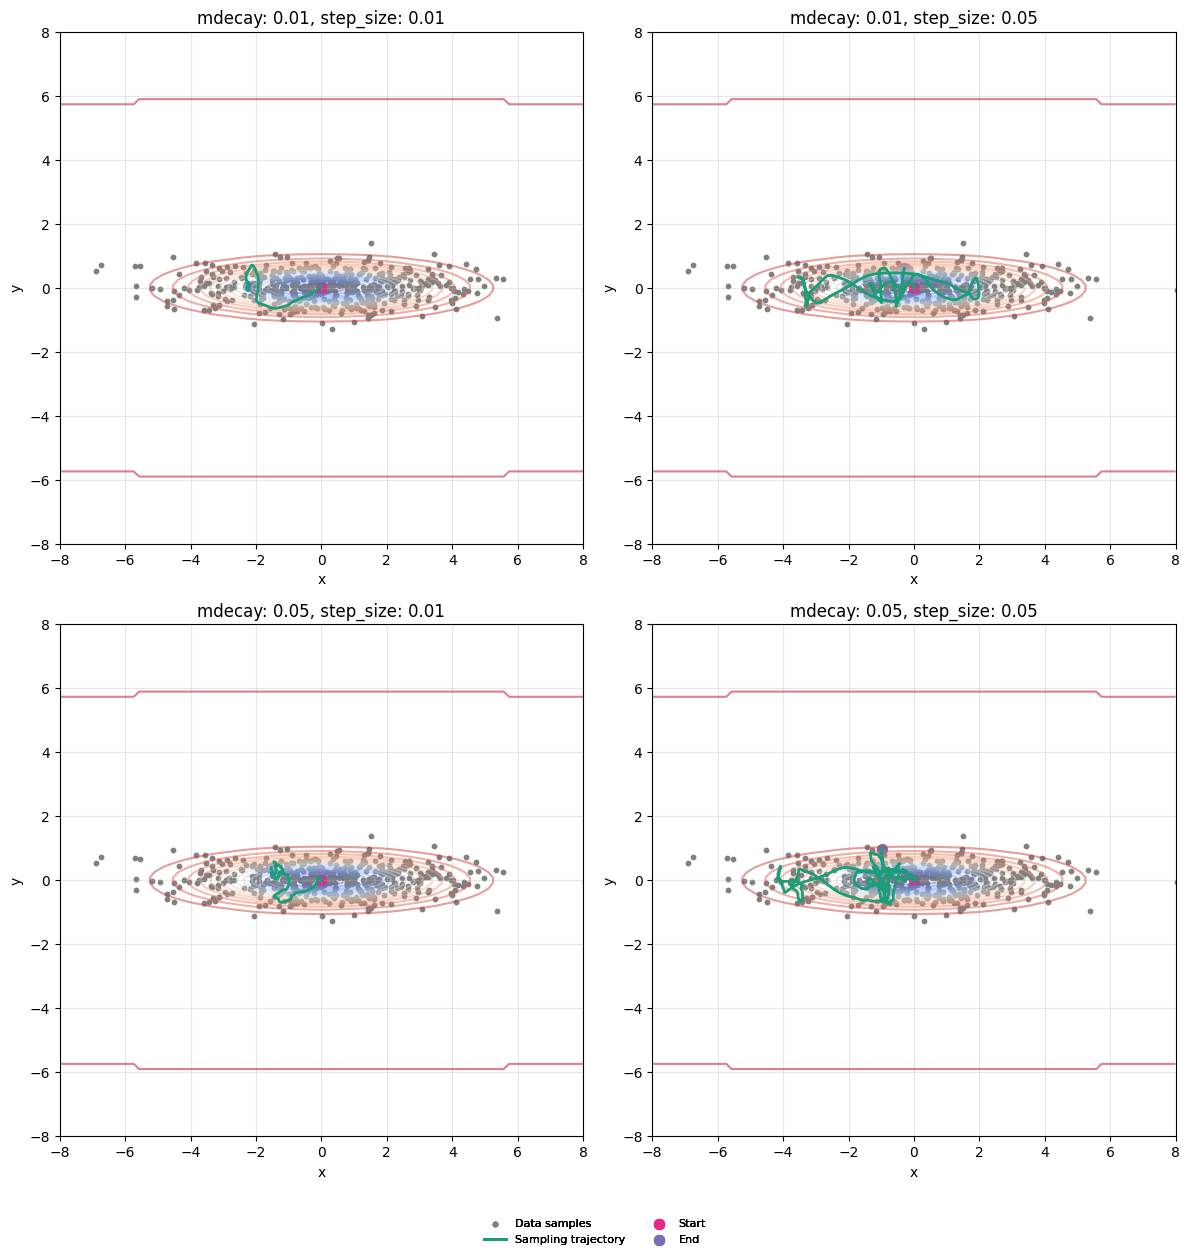

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

param_grid = list(
    product(
        [0.01, 0.05],
        [0.01, 0.05],
    )
)

axs_flat = axs.flatten()

for i, (mdecay, step_size) in enumerate(param_grid):
    data, trajectory = run_experiment(
        means=jnp.array([[0.0, 0.0]]),
        covs=jnp.array([[[5.0, 0.0], [0.0, 0.2]]]),
        weights=jnp.array([1.0]),
        data_samples=500,
        mcmc_samples=500,
        init_position=jnp.array([0.0, 0.0]),
        init_m="identity",
        mdecay=mdecay,
        step_size=step_size,
        n_batches=5,
        seed=3,
    )

    plot_gmm_sampling(
        fig=fig,
        ax=axs[i // 2, i % 2],
        trajectory=trajectory,
        samples=data,
        means=jnp.array([[0.0, 0.0]]),
        covs=jnp.array([[[5.0, 0.0], [0.0, 0.2]]]),
        weights=jnp.array([1.0]),
        title=f"mdecay: {mdecay}, step_size: {step_size}",
        plot_type="sampling",
        xlim=(-8, 8),
        ylim=(-8, 8),
    )

plt.tight_layout()
plt.show()

## Ill-Conditioned Gaussian
We conduct experiments with a ill-conditioned Gaussian ground truth we want to traverse with our MCMC sampler. Those experiments are performed over more seeds to get more meaningful metrics. We focus on the effect of preconditioning here, since we already looked into the hyperparameters in the above experiments. 

In [5]:
experiment_name = "illcond_gaussian_4"
df = load_experiment_data(experiment_name, remove_duplicates=True)

In [29]:
import os

os.getcwd()

'c:\\Users\\schla\\git\\enhancing-sgmcmc'

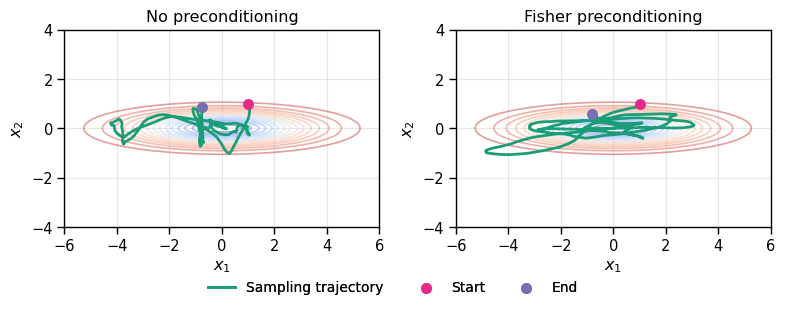

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

titles = ["No preconditioning", "Fisher preconditioning"]

for i, init_m in enumerate(["identity", "fisher_approx"]):
    data, trajectory = run_experiment(
        means=jnp.array([[0.0, 0.0]]),
        covs=jnp.array([[[5.0, 0.0], [0.0, 0.2]]]),
        weights=jnp.array([1.0]),
        data_samples=500,
        mcmc_samples=500,
        init_position=jnp.array([1.0, 1.0]),
        init_m=init_m,
        mdecay=0.02,
        step_size=0.05,
        n_batches=5,
        seed=3,
    )

    plot_gmm_sampling(
        fig=fig,
        ax=axs[i],
        trajectory=trajectory,
        samples=data,
        means=jnp.array([[0.0, 0.0]]),
        covs=jnp.array([[[5.0, 0.0], [0.0, 0.2]]]),
        weights=jnp.array([1.0]),
        title=titles[i],
        plot_type="sampling",
        show_samples=False,
        xlim=(-6, 6),
        ylim=(-4, 4),
    )

plt.tight_layout()
plt.savefig("results/figures/illcon_gaussian_precon.pdf", bbox_inches="tight", dpi=300)
plt.show()

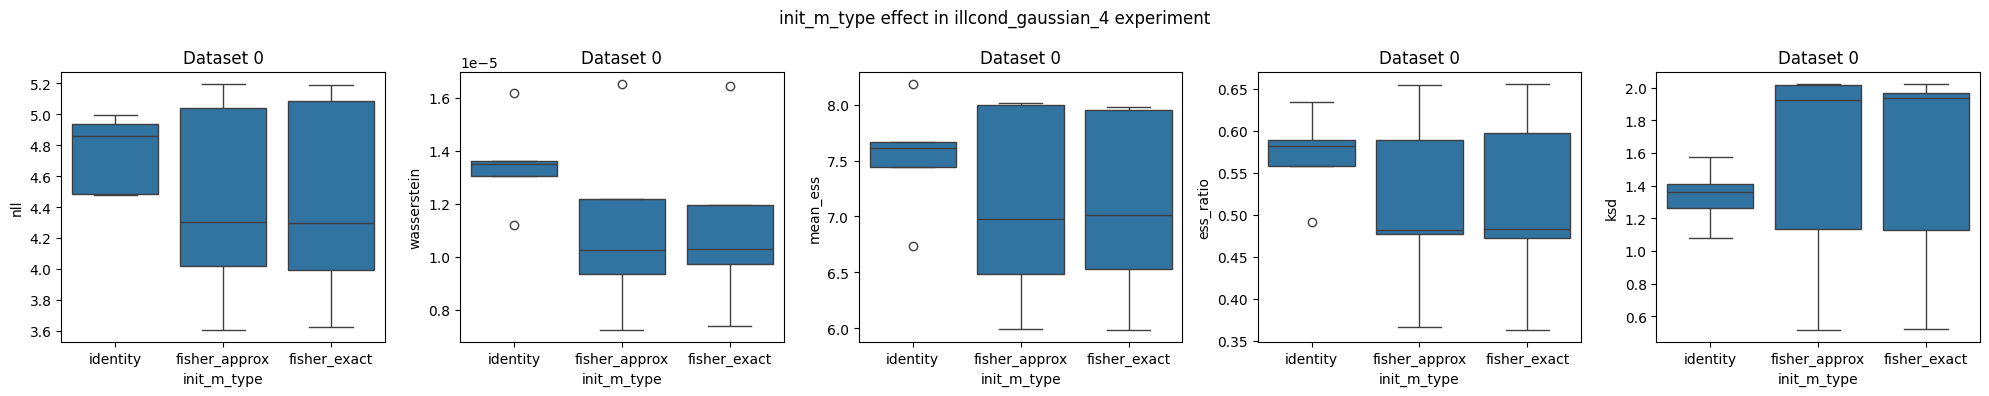

In [30]:
parameter = "init_m_type"

plot_combined_metric_comparison(
    df=df,
    metrics=["nll", "wasserstein", "mean_ess", "ess_ratio", "ksd"],
    filter_conditions={"mcmc_samples": 500},
    param=parameter,
    title=f"{parameter} effect in {experiment_name} experiment",
    figsize=(20, 4),
    save_path=f"thesis/figures/{experiment_name}_{parameter}.png",
);

## Gaussian Mixture

 By not only testing the sampler on a single mode we can get a better understanding of its behavior in a more complex posterior distribution.

### Load data

In [31]:
experiment_name = "bimodal_gaussian_2"
df = load_experiment_data(experiment_name)

### Effect of preconditioning

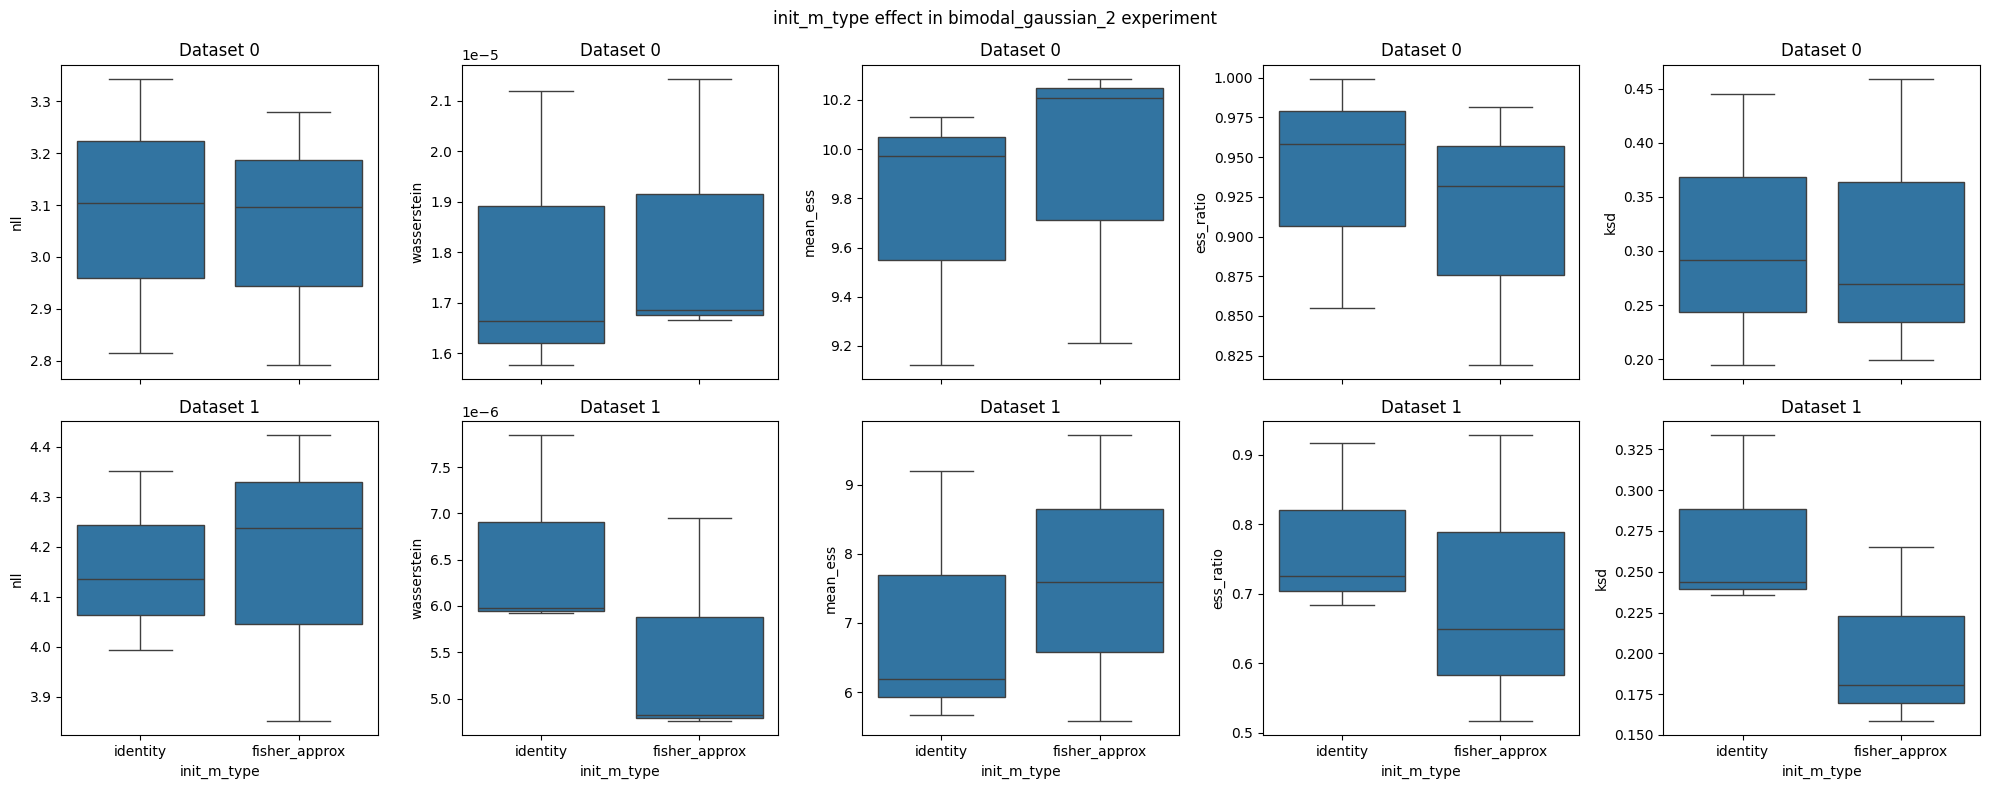

In [33]:
parameter = "init_m_type"

plot_combined_metric_comparison(
    df=df,
    metrics=["nll", "wasserstein", "mean_ess", "ess_ratio", "ksd"],
    filter_conditions={"mcmc_samples": 500},
    param=parameter,
    title=f"{parameter} effect in {experiment_name} experiment",
    figsize=(20, 8),
    save_path=f"thesis/figures/{experiment_name}_{parameter}.png",
);

For the not so well behaved bimodal distribution the effect of preconditioning is much larger. Preconditioning helps with exploring multiple modes and might therefore have advantages in traversing through a complex posterior landscape.

In [25]:
means = jnp.array([[2, 2], [-2, -2]])
covs = jnp.array([[[3, 0.7], [0.7, 4]], [[0.5, 0], [0, 3]]])
weights = jnp.array([0.75, 0.25])

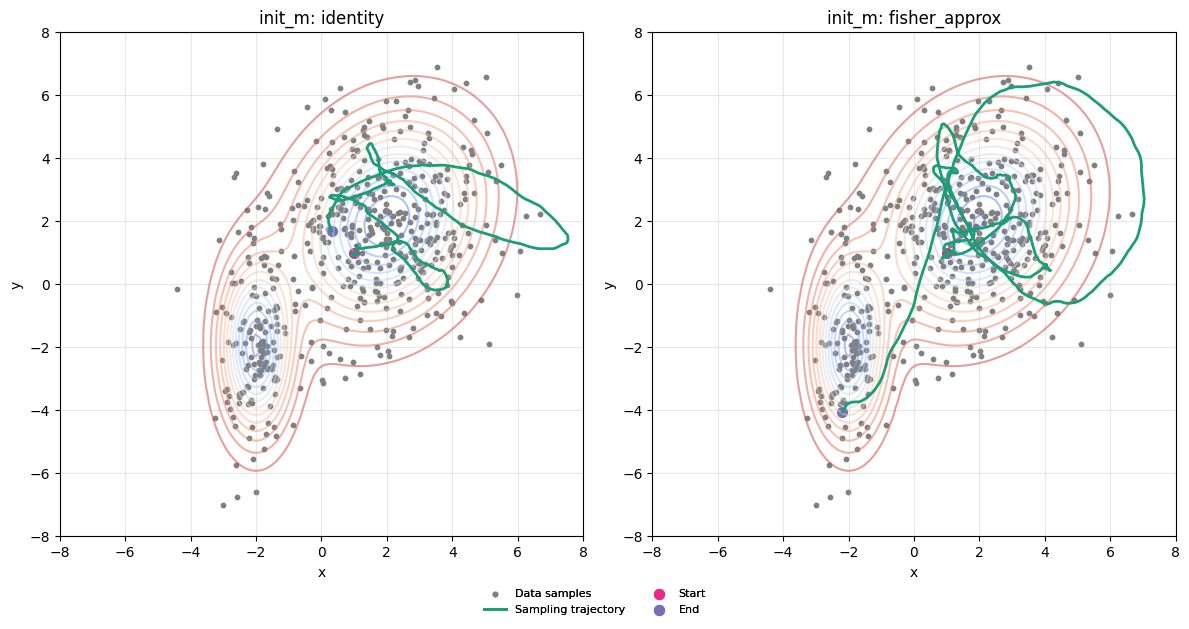

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, init_m in enumerate(["identity", "fisher_approx"]):
    data, trajectory = run_experiment(
        means=means,
        covs=covs,
        weights=weights,
        data_samples=500,
        mcmc_samples=500,
        init_position=jnp.array([1.0, 1.0]),
        init_m=init_m,
        mdecay=0.02,
        step_size=0.05,
        n_batches=5,
        seed=2,
    )

    plot_gmm_sampling(
        fig=fig,
        ax=axs[i],
        trajectory=trajectory,
        samples=data,
        means=means,
        covs=covs,
        weights=weights,
        title=f"init_m: {init_m}",
        plot_type="sampling",
        xlim=(-8, 8),
        ylim=(-8, 8),
    )

plt.tight_layout()
plt.show()